In [1]:
import pandas as pd
from csvCreator import get_readable_date
import numpy as np

In [2]:
def to_evenly_spaced(df):
    date = df['time'].apply(lambda x: get_readable_date(x))
    df.insert(loc=1, column='date', value=date)
    median = np.trunc(df.groupby('date').size().median())
    df.drop(['date'], axis=1, inplace=True)
    day = np.trunc(len(df.index) / median)
    new_last_index = int(median * day)

    even_time = []
    firs_time = df[['time']].iloc[1].values.item()
    for i in range(len(df.index)):
        even_time.append(firs_time)
        firs_time += 60
    df.drop(['time'], axis=1, inplace=True)
#     df.insert(loc=0, column='time', value=even_time)
    df = df.iloc[:new_last_index]
    return df.drop(['phq_2'], axis=1), df.drop(['phq_1'], axis=1), int(median)

In [3]:
def generator(data, look_b, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + look_b
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + look_b, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + look_b
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           look_b // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - look_b, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets


In [4]:
output_path = '/Volumes/hex/ST1814523348-res/'
p = pd.read_csv(output_path + 'ST1814523348_1.0.csv')

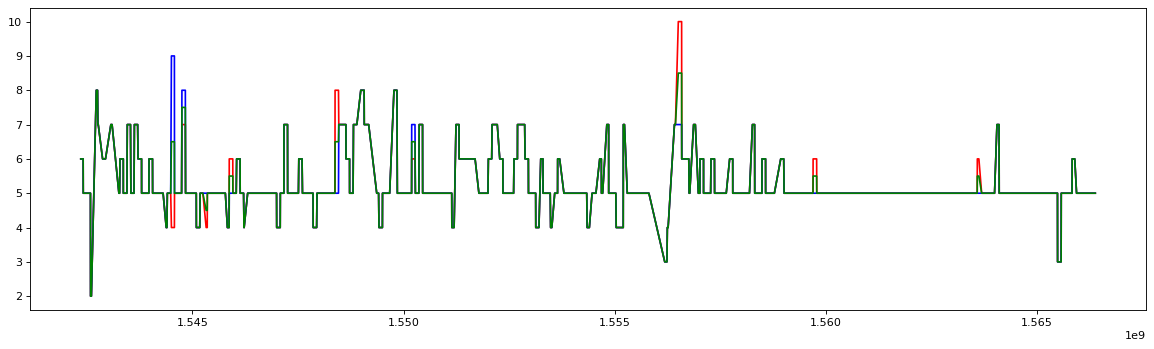

In [5]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
yaxis2 = p[['phq_2']]
avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [6]:
p.head()

,time,window,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,...,mood,tense,tired,rumination,socialize,socialize_val,work_time,day_sleep,phq_1,phq_2
0,1542355552,377,7.24,5.79,3.19,2.39,2.15,2.39,-0.21,30.36,...,4,4,1,2,50,49,60,0,6,6
1,1542355929,58,-0.03,0.30,-0.03,0.21,9.92,0.21,-0.07,5.93,...,4,4,1,2,50,49,60,0,6,6
2,1542355987,59,-0.02,0.03,-0.03,0.04,9.93,0.04,-0.14,0.14,...,4,4,1,2,50,49,60,0,6,6
3,1542356046,58,-0.03,0.03,-0.03,0.04,9.92,0.04,-0.21,0.12,...,4,4,1,2,50,49,60,0,6,6
4,1542356104,59,-0.03,0.05,-0.03,0.04,9.91,0.04,-0.28,0.11,...,4,4,1,2,50,49,60,0,6,6


In [7]:
# drop zero columns (or almost zeros)
p = p.drop(['date'], axis=1)

In [8]:
# just numerical data
p = p.drop([ 'window'], axis=1)
p_1, p_2, median = to_evenly_spaced(p)

In [9]:
float_data_1 = p_1.to_numpy()
p_1.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,ple_std,mood,tense,tired,rumination,socialize,socialize_val,work_time,day_sleep,phq_1
0,7.24,5.79,3.19,2.39,2.15,2.39,-0.21,30.36,0.14,84.57,...,154353.46,4,4,1,2,50,49,60,0,6
1,-0.03,0.30,-0.03,0.21,9.92,0.21,-0.07,5.93,0.14,14.47,...,103283.96,4,4,1,2,50,49,60,0,6
2,-0.02,0.03,-0.03,0.04,9.93,0.04,-0.14,0.14,0.14,0.15,...,29792.55,4,4,1,2,50,49,60,0,6
3,-0.03,0.03,-0.03,0.04,9.92,0.04,-0.21,0.12,0.14,0.14,...,17934.05,4,4,1,2,50,49,60,0,6
4,-0.03,0.05,-0.03,0.04,9.91,0.04,-0.28,0.11,0.14,0.14,...,12800.79,4,4,1,2,50,49,60,0,6


In [10]:
float_data_2 = p_2.to_numpy()
p_2.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,ple_std,mood,tense,tired,rumination,socialize,socialize_val,work_time,day_sleep,phq_2
0,7.24,5.79,3.19,2.39,2.15,2.39,-0.21,30.36,0.14,84.57,...,154353.46,4,4,1,2,50,49,60,0,6
1,-0.03,0.30,-0.03,0.21,9.92,0.21,-0.07,5.93,0.14,14.47,...,103283.96,4,4,1,2,50,49,60,0,6
2,-0.02,0.03,-0.03,0.04,9.93,0.04,-0.14,0.14,0.14,0.15,...,29792.55,4,4,1,2,50,49,60,0,6
3,-0.03,0.03,-0.03,0.04,9.92,0.04,-0.21,0.12,0.14,0.14,...,17934.05,4,4,1,2,50,49,60,0,6
4,-0.03,0.05,-0.03,0.04,9.91,0.04,-0.28,0.11,0.14,0.14,...,12800.79,4,4,1,2,50,49,60,0,6


In [11]:
median

658

In [12]:
# first 200 days as training
mean = float_data_1[:119756].mean(axis=0)
float_data_1 -= mean
std = float_data_1[:119756].std(axis=0)
float_data_1 /= std

In [13]:
# first 200 days as training
mean = float_data_2[:119756].mean(axis=0)
float_data_2 -= mean
std = float_data_2[:119756].std(axis=0)
float_data_2 /= std

In [14]:
float_data_1[0]

array([ 2.13309332,  1.61132903,  2.18563712,  0.07221378,  0.14534047,
        0.07221378,  0.01717128, -0.4483637 ,  0.01367826,  3.32255866,
        0.07906849,  0.06360406, -0.03499378, -0.23898903,  0.297069  ,
       -0.47060621, -0.7376451 ,  0.18686383, -1.19119519, -1.53319754,
       -0.88513345,  0.44983753,  1.1433496 ,  0.71796772,  1.16443981,
       -0.45252129,  0.59278977])

In [15]:
float_data_2[0]

array([ 2.13309332,  1.61132903,  2.18563712,  0.07221378,  0.14534047,
        0.07221378,  0.01717128, -0.4483637 ,  0.01367826,  3.32255866,
        0.07906849,  0.06360406, -0.03499378, -0.23898903,  0.297069  ,
       -0.47060621, -0.7376451 ,  0.18686383, -1.19119519, -1.53319754,
       -0.88513345,  0.44983753,  1.1433496 ,  0.71796772,  1.16443981,
       -0.45252129,  0.60443511])

In [16]:
# assume each day got 744 value (average value) that means 17 value per Hour.
# most probably will be 3
# step = 60 / (median / 24)
step = 2
# observations will look back 7 days (average)
look_back = step * 7 * 24
delay = 24 * step

# one day
batch_size = median

In [17]:
batch_size

658

In [18]:
step

2

In [19]:
print (len(p_1))
print (len(p_2))

165816
165816


In [20]:
# for phq-1
train_gen_1 = generator(float_data_1,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=119756,
                      shuffle=False,
                      step=step,
                      batch_size=batch_size)
val_gen_1 = generator(float_data_1,
                    look_b=look_back,
                    delay=delay,
                    min_index=119757,
                    max_index=146076,
                    step=step,
                    batch_size=batch_size)
test_gen_1 = generator(float_data_1,
                     look_b=look_back,
                     delay=delay,
                     min_index=146077,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


In [56]:
# for phq-1
train_gen_2 = generator(float_data_2,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=119756,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_2 = generator(float_data_2,
                    look_b=look_back,
                    delay=delay,
                    min_index=119757,
                    max_index=146076,
                    step=step,
                    batch_size=batch_size)
test_gen_2 = generator(float_data_2,
                     look_b=look_back,
                     delay=delay,
                     min_index=146077,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [21]:
test_steps = (len(p_1.index) - 146076)//batch_size
val_steps = (146076 - 119756)//batch_size
per_epoch =119756//batch_size
per_epoch

182

In [22]:
val_steps 

40

In [23]:
test_steps

30

In [24]:
def evaluate_naive_model(v_gen):
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(v_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [25]:
evaluate_naive_model(val_gen_1)

1.0044633800190712


In [62]:
evaluate_naive_model(val_gen_2)

1.0003752057812896


# One GRU layer Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [65]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data_1.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimzer=RMSprop(), loss='mae')
history = model.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 182 steps, validate for 40 steps
Epoch 1/20
182/182 [==============================] - 131s 720ms/step - loss: 0.2262 - val_loss: 0.0790
Epoch 2/20
182/182 [==============================] - 120s 657ms/step - loss: 0.1231 - val_loss: 0.0539
Epoch 3/20
182/182 [==============================] - 125s 688ms/step - loss: 0.1088 - val_loss: 0.0508
Epoch 4/20
182/182 [==============================] - 127s 700ms/step - loss: 0.1040 - val_loss: 0.0475
Epoch 5/20
182/182 [==============================] - 127s 698ms/step - loss: 0.0988 - val_loss: 0.0460
Epoch 6/20
182/182 [==============================] - 124s 684ms/step - loss: 0.0951 - val_loss: 0.0429
Epoch 7/20
182/182 [==============================] - 123s 677ms/step - loss: 0.0931 - val_loss: 0.0387
Epoch 8/20
182/182 [==============================] - 124s 680ms/step - loss: 0.0906 - val_loss: 0.0421
Epoch 9/20
182/182 [==============================] - 195s 1s/step - loss: 0.0901 - val_loss: 0.0347
Epoch 10/20
182/182 [===

In [68]:
model.save('model_1_348.h5')

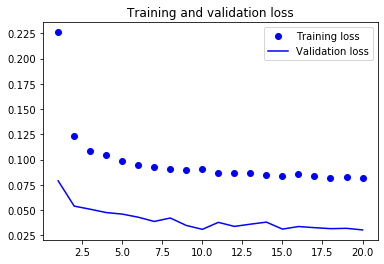

In [69]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [73]:
model.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 7s 247ms/step - loss: 0.0288


0.028827047316978376

# One GRU unit for phq-2

In [74]:
model_1_2 = Sequential()
model_1_2.add(layers.GRU(32, input_shape=(None, float_data_2.shape[-1])))
model_1_2.add(layers.Dense(1))

model_1_2.compile(optimzer=RMSprop(), loss='mae')
history_1_2 = model_1_2.fit(train_gen_2,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_2,
                    validation_steps=val_steps)


Train for 182 steps, validate for 40 steps
Epoch 1/20
182/182 [==============================] - 83s 456ms/step - loss: 0.2384 - val_loss: 0.0741
Epoch 2/20
182/182 [==============================] - 75s 414ms/step - loss: 0.1214 - val_loss: 0.0581
Epoch 3/20
182/182 [==============================] - 76s 415ms/step - loss: 0.1132 - val_loss: 0.0540
Epoch 4/20
182/182 [==============================] - 76s 415ms/step - loss: 0.1038 - val_loss: 0.0494
Epoch 5/20
182/182 [==============================] - 76s 415ms/step - loss: 0.0980 - val_loss: 0.0454
Epoch 6/20
182/182 [==============================] - 76s 415ms/step - loss: 0.0963 - val_loss: 0.0360
Epoch 7/20
182/182 [==============================] - 76s 416ms/step - loss: 0.0933 - val_loss: 0.0385
Epoch 8/20
182/182 [==============================] - 76s 417ms/step - loss: 0.0916 - val_loss: 0.0387
Epoch 9/20
182/182 [==============================] - 76s 417ms/step - loss: 0.0908 - val_loss: 0.0405
Epoch 10/20
182/182 [=========

In [75]:
model.save('model_1_2_348.h5')

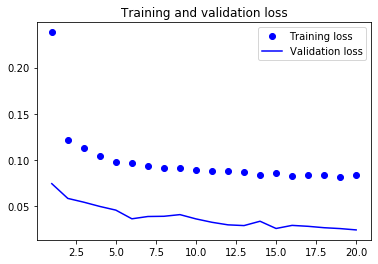

In [76]:
loss = history_1_2.history['loss']
val_loss = history_1_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [77]:
model_1_2.evaluate(test_gen_2, steps=30)

30/30 [==============================] - 4s 121ms/step - loss: 0.0313


0.03133231257088483

# 1D convenet

In [78]:
model_2 = Sequential()
model_2.add(layers.Conv1D(32, 5, activation='relu',
                            input_shape=(None, float_data_1.shape[-1])))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.GlobalMaxPooling1D())
model_2.add(layers.Dense(1))

model_2.compile(optimizer=RMSprop(), loss='mae')
history_2 = model_2.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Train for 182 steps, validate for 40 steps
Epoch 1/20
182/182 [==============================] - 31s 168ms/step - loss: 0.3582 - val_loss: 0.1212
Epoch 2/20
182/182 [==============================] - 30s 163ms/step - loss: 0.2205 - val_loss: 0.0785
Epoch 3/20
182/182 [==============================] - 29s 162ms/step - loss: 0.1866 - val_loss: 0.0698
Epoch 4/20
182/182 [==============================] - 30s 163ms/step - loss: 0.1736 - val_loss: 0.0701
Epoch 5/20
182/182 [==============================] - 30s 163ms/step - loss: 0.1615 - val_loss: 0.0642
Epoch 6/20
182/182 [==============================] - 30s 163ms/step - loss: 0.1514 - val_loss: 0.0683
Epoch 7/20
182/182 [==============================] - 29s 162ms/step - loss: 0.1439 - val_loss: 0.0705
Epoch 8/20
182/182 [==============================] - 30s 165ms/step - loss: 0.1366 - val_loss: 0.0691
Epoch 9/20
182/182 [==============================] - 31s 171ms/step - loss: 0.1333 - val_loss: 0.0690
Epoch 10/20
182/182 [=========

In [79]:
model_2.save('model_2_348.h5') 

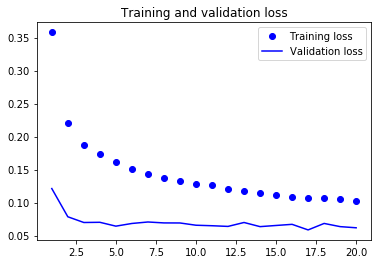

In [80]:
import matplotlib.pyplot as plt
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [81]:
model_2.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 2s 56ms/step - loss: 0.0779


0.07793070257951816

# 1D convnet and GRU model

In [82]:

model_3 = Sequential()
model_3.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_3.add(layers.MaxPooling1D(3))
model_3.add(layers.Conv1D(32, 5, activation='relu'))
model_3.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.3))
model_3.add(layers.Dense(1))

model_3.summary()
model_3.compile(optimizer=RMSprop(), loss='mae')
history_3 = model_3.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          4352      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 15,873
Trainable params: 15,873
Non-trainable params: 0
_________________________________________________________________
Train for 182 steps, validate for 40 steps
Epoch 1/20
182/182 [==============================] - 55s 303ms/step - lo

In [83]:
model_3.save('model_3_348.h5') 

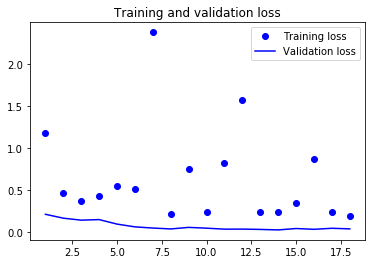

In [84]:
loss = history_3.history['loss'][1:-1]
val_loss = history_3.history['val_loss'][1:-1]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [85]:
model_3.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 97ms/step - loss: 0.0557


0.055715595930814744

In [86]:
model_7 = Sequential()
model_7.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_7.add(layers.MaxPooling1D(3))
model_7.add(layers.Conv1D(32, 5, activation='relu'))
model_7.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2))
model_7.add(layers.Dense(1))

model_7.summary()
model_7.compile(optimizer=RMSprop(), loss='mae')
history_7 = model_7.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=10,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, None, 32)          4352      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 15,873
Trainable params: 15,873
Non-trainable params: 0
_________________________________________________________________
Train for 182 steps, validate for 40 steps
Epoch 1/10
182/182 [==============================] - 56s 308ms/step - lo

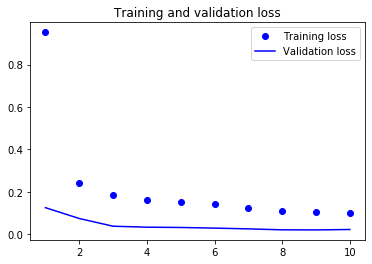

In [87]:
loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [88]:
model_7.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 95ms/step - loss: 0.0571


0.05708036886838575

# One GRU layer with recurrent dropout

In [89]:
model_4 = Sequential()
model_4.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     input_shape=(None, float_data_1.shape[-1])))
model_4.add(layers.Dense(1))

model_4.compile(optimizer=RMSprop(), loss='mae')
history_4 = model_4.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 182 steps, validate for 40 steps
Epoch 1/20
182/182 [==============================] - 101s 556ms/step - loss: 140.4030 - val_loss: 0.5626
Epoch 2/20
182/182 [==============================] - 100s 548ms/step - loss: 1.4280 - val_loss: 0.1667
Epoch 3/20
182/182 [==============================] - 100s 549ms/step - loss: 7.4386 - val_loss: 0.1203
Epoch 4/20
182/182 [==============================] - 99s 542ms/step - loss: 0.4681 - val_loss: 0.0886
Epoch 5/20
182/182 [==============================] - 99s 542ms/step - loss: 0.3550 - val_loss: 0.0750
Epoch 6/20
182/182 [==============================] - 99s 543ms/step - loss: 1.2667 - val_loss: 0.0763
Epoch 7/20
182/182 [==============================] - 99s 543ms/step - loss: 0.2716 - val_loss: 0.0546
Epoch 8/20
182/182 [==============================] - 99s 546ms/step - loss: 1.2423 - val_loss: 0.0598
Epoch 9/20
182/182 [==============================] - 99s 544ms/step - loss: 0.6111 - val_loss: 0.0575
Epoch 10/20
182/182 [====

In [90]:
model_4.save('model_4_348.h5') 

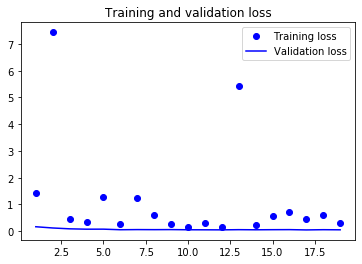

In [91]:
loss = history_4.history['loss'][1:]
val_loss = history_4.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

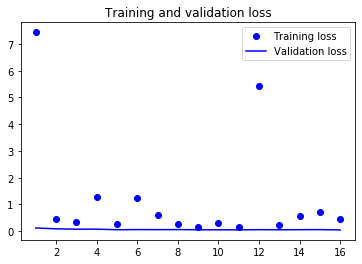

In [92]:
loss = history_4.history['loss'][2:-2]
val_loss = history_4.history['val_loss'][2:-2]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [93]:
model_4.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 4s 130ms/step - loss: 0.0624


0.06236579269170761

In [94]:
model_5 = Sequential()
model_5.add(layers.Conv1D(64, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_5.add(layers.MaxPooling1D(3))
model_5.add(layers.Conv1D(64, 5, activation='relu'))
model_5.add(layers.GRU(64, dropout=0.1, recurrent_dropout=0.2))
model_5.add(layers.Dense(1))

model_5.summary()
model_5.compile(optimizer=RMSprop(), loss='mae')
history_5 = model_5.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 64)          8704      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
gru_5 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 54,273
Trainable params: 54,273
Non-trainable params: 0
_________________________________________________________________
Train for 182 steps, validate for 40 steps
Epoch 1/20
182/182 [==============================] - 92s 507ms/step - lo

In [95]:
model_5.save('model_5_348.h5') 

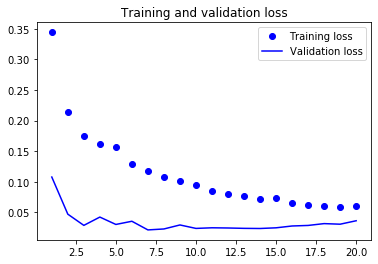

In [96]:
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [97]:
model_5.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 4s 148ms/step - loss: 0.0524


0.05242161336354911

In [27]:
model_temp = Sequential()
model_temp.add(layers.GRU(32, input_shape=(None, float_data_1.shape[-1])))
model_temp.add(layers.Dense(1))

model_temp.compile(optimzer=RMSprop(), loss='mae')
histor = model_temp.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)

Train for 182 steps, validate for 40 steps
Epoch 1/20
182/182 [==============================] - 82s 451ms/step - loss: 0.5076 - val_loss: 0.1396
Epoch 2/20
182/182 [==============================] - 80s 439ms/step - loss: 0.1900 - val_loss: 0.1098
Epoch 3/20
182/182 [==============================] - 75s 411ms/step - loss: 0.1628 - val_loss: 0.0787
Epoch 4/20
182/182 [==============================] - 73s 401ms/step - loss: 0.1451 - val_loss: 0.1028
Epoch 5/20
182/182 [==============================] - 75s 413ms/step - loss: 0.1388 - val_loss: 0.0543
Epoch 6/20
182/182 [==============================] - 75s 414ms/step - loss: 0.1297 - val_loss: 0.0547
Epoch 7/20
182/182 [==============================] - 72s 395ms/step - loss: 0.1249 - val_loss: 0.0534
Epoch 8/20
182/182 [==============================] - 74s 406ms/step - loss: 0.1227 - val_loss: 0.0623
Epoch 9/20
182/182 [==============================] - 74s 408ms/step - loss: 0.1214 - val_loss: 0.0517
Epoch 10/20
182/182 [=========

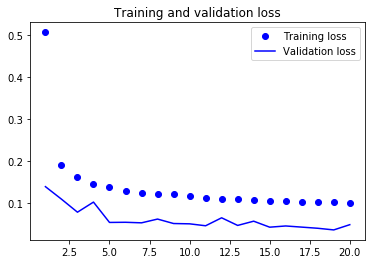

In [28]:
import matplotlib.pyplot as plt
loss = histor.history['loss']
val_loss = histor.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
model_temp.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 4s 127ms/step - loss: 0.0528


0.052842712464431923